In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

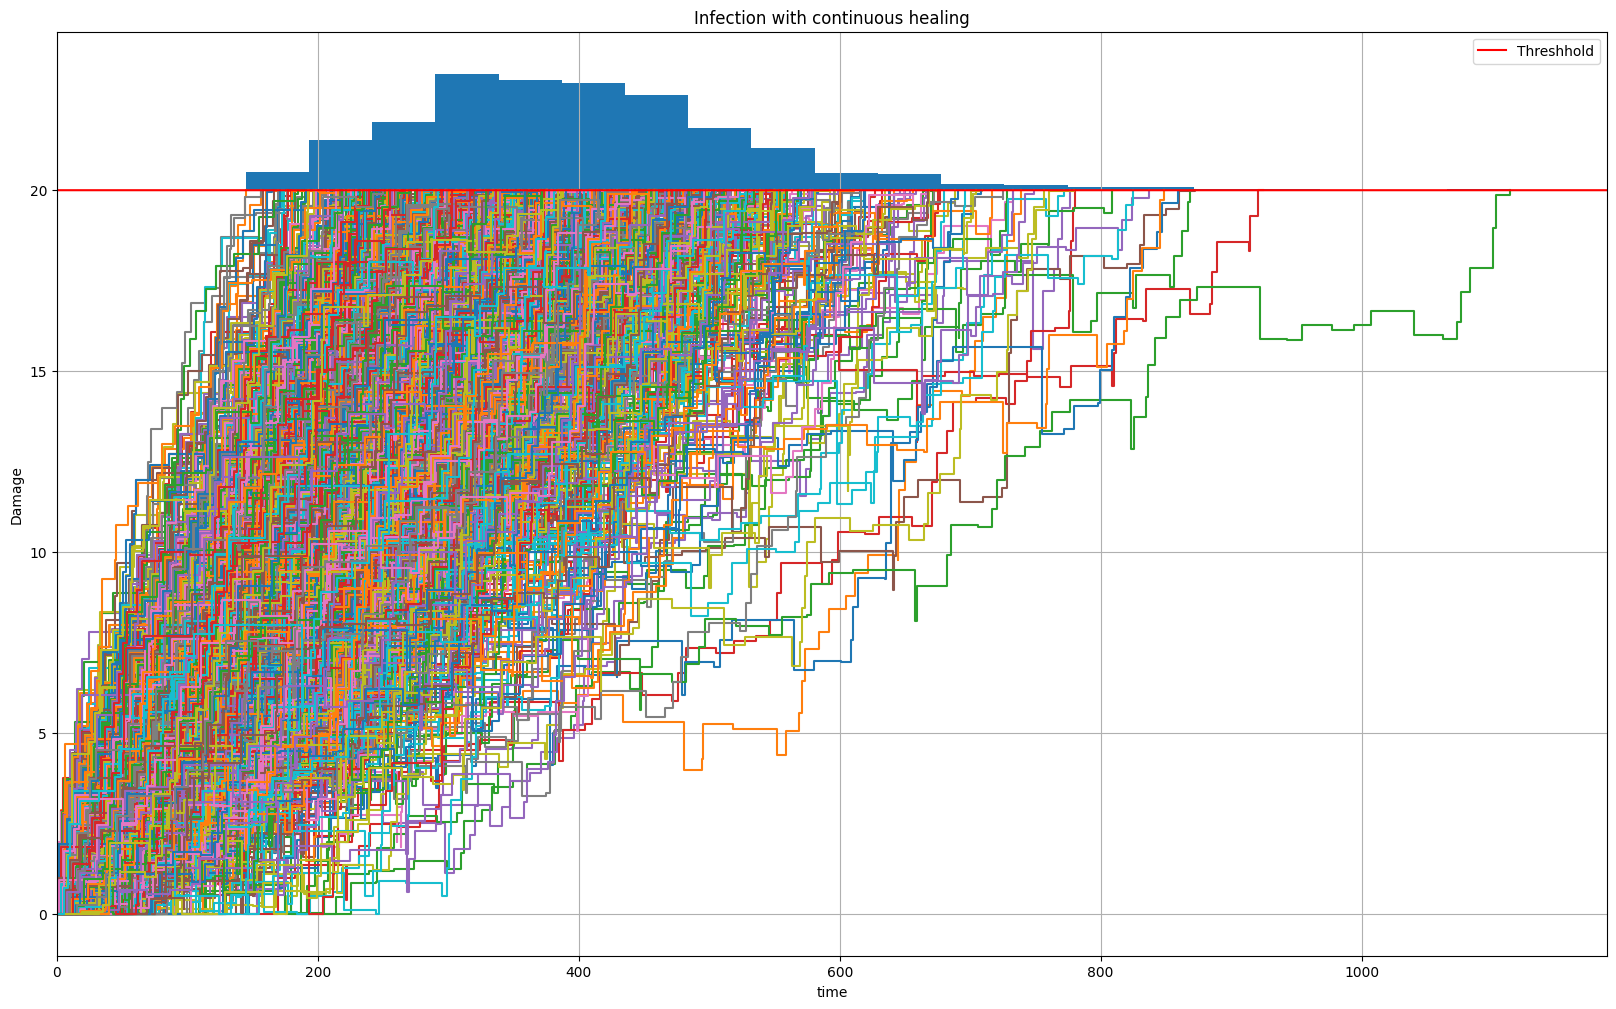

In [3]:
#Continuous healing model
def infection(initial, rate, threshhold, healing_factor):
    states = [initial]
    times = [0]
    current_state = initial
    time = 0
    
    while current_state < threshhold:
        x1 = np.random.uniform(0,1) #Draw random numbers
        tau = -1/rate * np.log(x1) #Calculate time of next transition
        
        #Update values
        time += tau
        current_state += 1
        
        #Account for Bacteria healing itself
        if current_state > 0: 
            current_state -= healing_factor * tau
            if current_state < 0: #Avoid overhealing
                current_state = 0
        
        if current_state > threshhold:
            current_state = threshhold

        #Append lists
        states.append(current_state)
        times.append(time)

    return times, states


N = 1000
initial = 0
rate = 0.1
threshhold = 20
heal = 0.05
tmax = 0
t_end = []

plt.figure(figsize = (20,12))
plt.title('Infection with continuous healing')
plt.grid()

for i in range(N):
    times, states = infection(initial, rate, threshhold, heal)
    t_end.append(max(times))
    plt.step(times, states, where = 'post')
    if max(times) > tmax:
        tmax = max(times)


plt.plot(np.arange(0,round(tmax + tmax/5)), threshhold * np.ones(round(tmax + tmax/5)), color = 'red', label = 'Threshhold')
plt.hist(t_end, bins = 20, weights = np.full(N, threshhold/N), bottom = threshhold)
plt.xlabel('time')
plt.ylabel('Damage')
plt.xlim(0,tmax + tmax/15)
plt.legend()


# Write Latex Document of code
# Make Histogram of First Passage times
# Make healing a stochastic variable
# Try doing multi-stage infections? Or is it unphysical?

20


(0.0, 0.02)

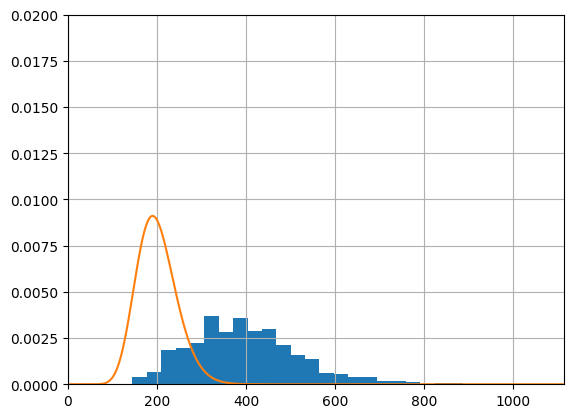

In [4]:
def erlang(x, L, k):
    return L**(k) * x**(k - 1) * np.exp(-L * x) / m.factorial(k - 1)

x = np.linspace(0, max(t_end), 1000)
y = erlang(x, rate, threshhold)
print(round(heal * np.mean(t_end)))

plt.figure()
plt.grid()
plt.hist(t_end, density = True, bins = 30)
plt.plot(x,y)
plt.xlim(0, max(t_end))
plt.ylim(0, 0.02)

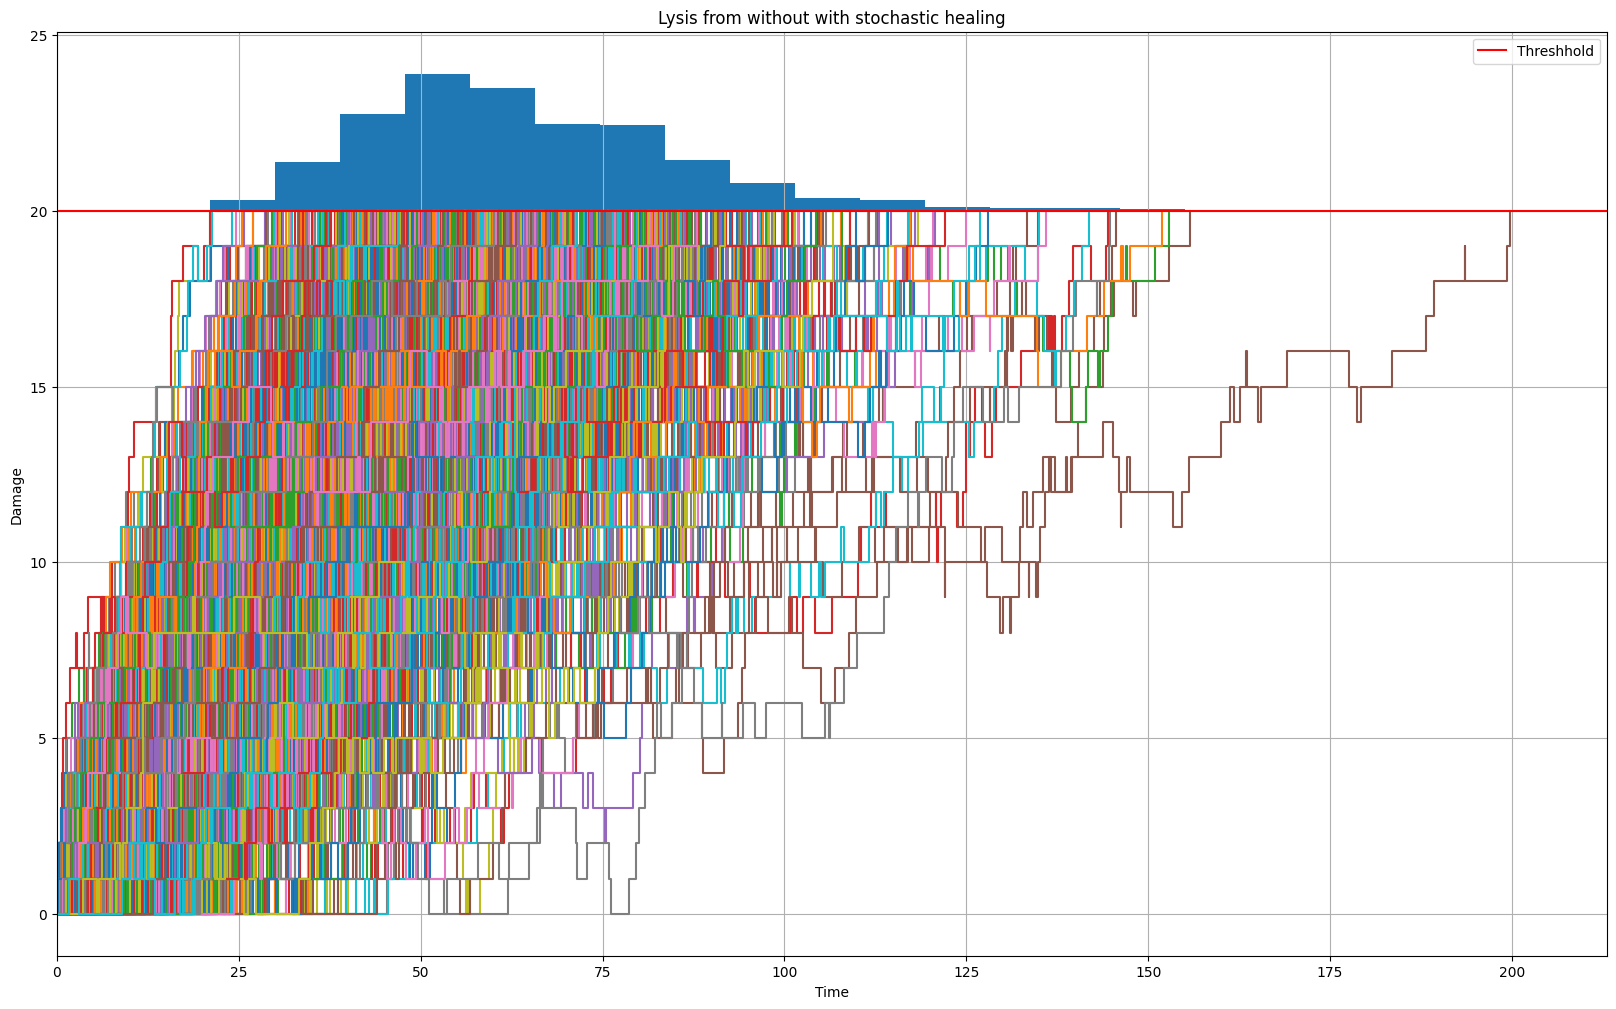

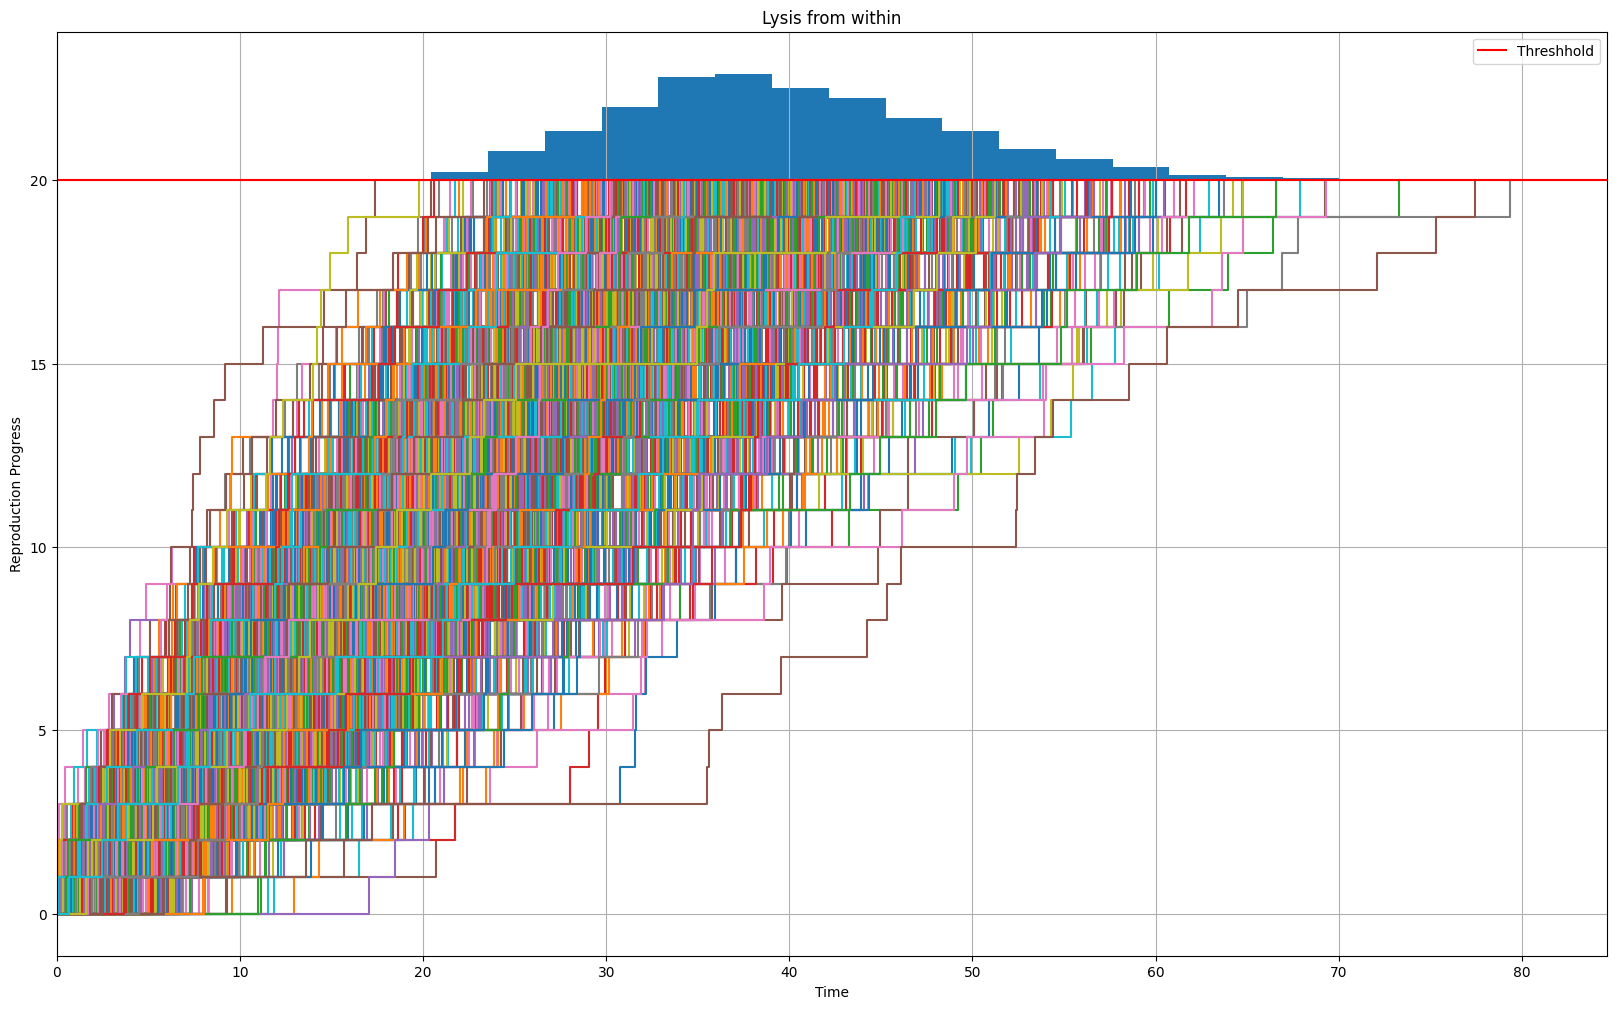

In [5]:
#Lysis from without
#Stochastic healing model
def infection(initial, rate_out, threshhold, healing_factor):
    W = rate_out + healing_factor
    states = [initial]
    times = [0]
    current_state = initial
    time = 0
    
    while current_state < threshhold:
        #Draw random numbers
        x1 = np.random.uniform(0,1)
        x2 = np.random.uniform(0,1)

        #Calculate time of next transition
        tau = -1/W * np.log(x1)
        
        #Damage transition
        if rate_out >= x2 * W:
            current_state += 1
            #Avoid overdamaging
            if current_state > threshhold:
                current_state = threshhold
        
        #Healing transition
        else:
            current_state -= 1
            #Avoid overhealing
            if current_state < 0:
                current_state = 0

        #Update time
        time += tau
        
        #Append lists
        states.append(current_state)
        times.append(time)

    return times, states

#Lysis from within
def within(initial, rate, threshhold):
    states = [initial]
    times = [0]
    current_state = initial
    time = 0

    while current_state < threshhold:
        x1 = np.random.uniform(0,1)
        tau = -1/rate * np.log(x1)

        current_state += 1
        time += tau

        states.append(current_state)
        times.append(time)

    return times, states



N = 1000
initial = 0
rate_out = 0.5
rate_in = 0.5
heal = 0.2
threshhold_out = 20
threshhold_in = 20

t_maxout = 0
t_maxin = 0
t_endout = []
t_endin = []


for i in range(N):
    times_out, states_out = infection(initial, rate_out, threshhold_out, heal)
    times_in, states_in = within(initial, rate_in, threshhold_in)
    t_endout.append(max(times_out))
    t_endin.append(max(times_in))

    plt.figure(0, figsize = (20,12))
    plt.step(times_out, states_out, where = 'post')

    plt.figure(1, figsize = (20,12))
    plt.step(times_in, states_in, where = 'post')

    if max(times_out) > t_maxout:
        t_maxout = max(times_out)
    
    if max(times_in) > t_maxin:
        t_maxin = max(times_in)

#Lysis from without plot
plt.figure(0)
plt.title('Lysis from without with stochastic healing')
plt.grid()
plt.plot(np.arange(0,round(t_maxout + t_maxout/5)), threshhold_out * np.ones(round(t_maxout + t_maxout/5)), color = 'red', label = 'Threshhold')
plt.hist(t_endout, bins = 20, weights = np.full(N, threshhold_out/N), bottom = threshhold_out)
plt.xlabel('Time')
plt.ylabel('Damage')
plt.xlim(0,t_maxout + t_maxout/15)
plt.legend()

#Lysis from within plot
plt.figure(1)
plt.title('Lysis from within')
plt.grid()
plt.plot(np.arange(0,round(t_maxin + t_maxin/5)), threshhold_in * np.ones(round(t_maxin + t_maxin/5)), color = 'red', label = 'Threshhold')
plt.hist(t_endin, bins = 20, weights = np.full(N, threshhold_in/N), bottom = threshhold_in)
plt.xlabel('Time')
plt.ylabel('Reproduction Progress')
plt.xlim(0,t_maxin + t_maxin/15)
plt.legend()

#Compare with Erlang distribution
#Determine P(t) from histogram
#Create model with competing processes: Lysis from within and without.

<BarContainer object of 2 artists>

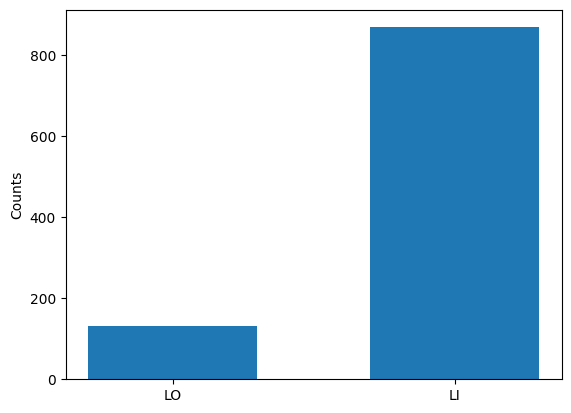

In [6]:
t_endout = np.array([t_endout])
t_endin = np.array([t_endin])
LO_success = t_endout[t_endout < t_endin]
LI_success = t_endin[t_endin < t_endout]
L = [len(LO_success), len(LI_success)]
x = ['LO', 'LI']

plt.figure()
plt.ylabel('Counts')
plt.bar(range(len(L)), L, width = 0.6, tick_label=x)

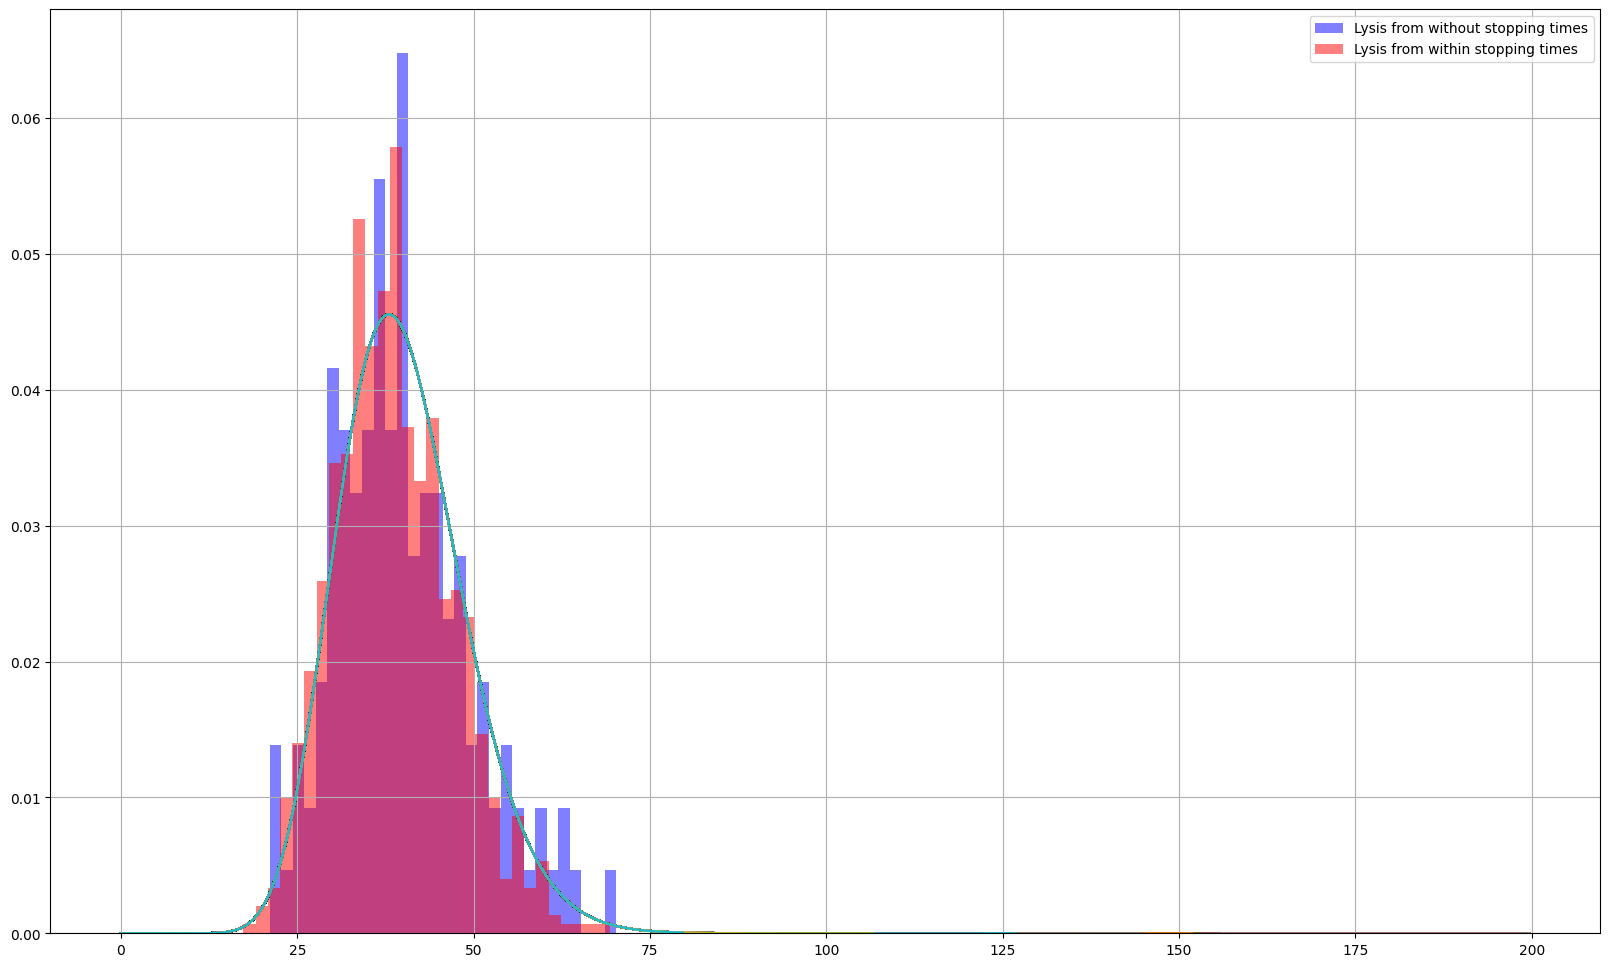

In [7]:
plt.figure(figsize = (20,12))
plt.grid()
plt.hist(LO_success, bins = 30, density = True, color = 'blue', label = 'Lysis from without stopping times', alpha = 0.5)
plt.hist(LI_success, bins = 30, density = True, color = 'red', label = 'Lysis from within stopping times', alpha = 0.5)
x = np.linspace(0, max(t_endout), 1000)
In = erlang(x, rate_in, threshhold_in)
plt.plot(x, In)
plt.legend()


In [8]:
# Combine the Two processes
# Add Lyssi inhibition -> when Lo occurs LI is setback


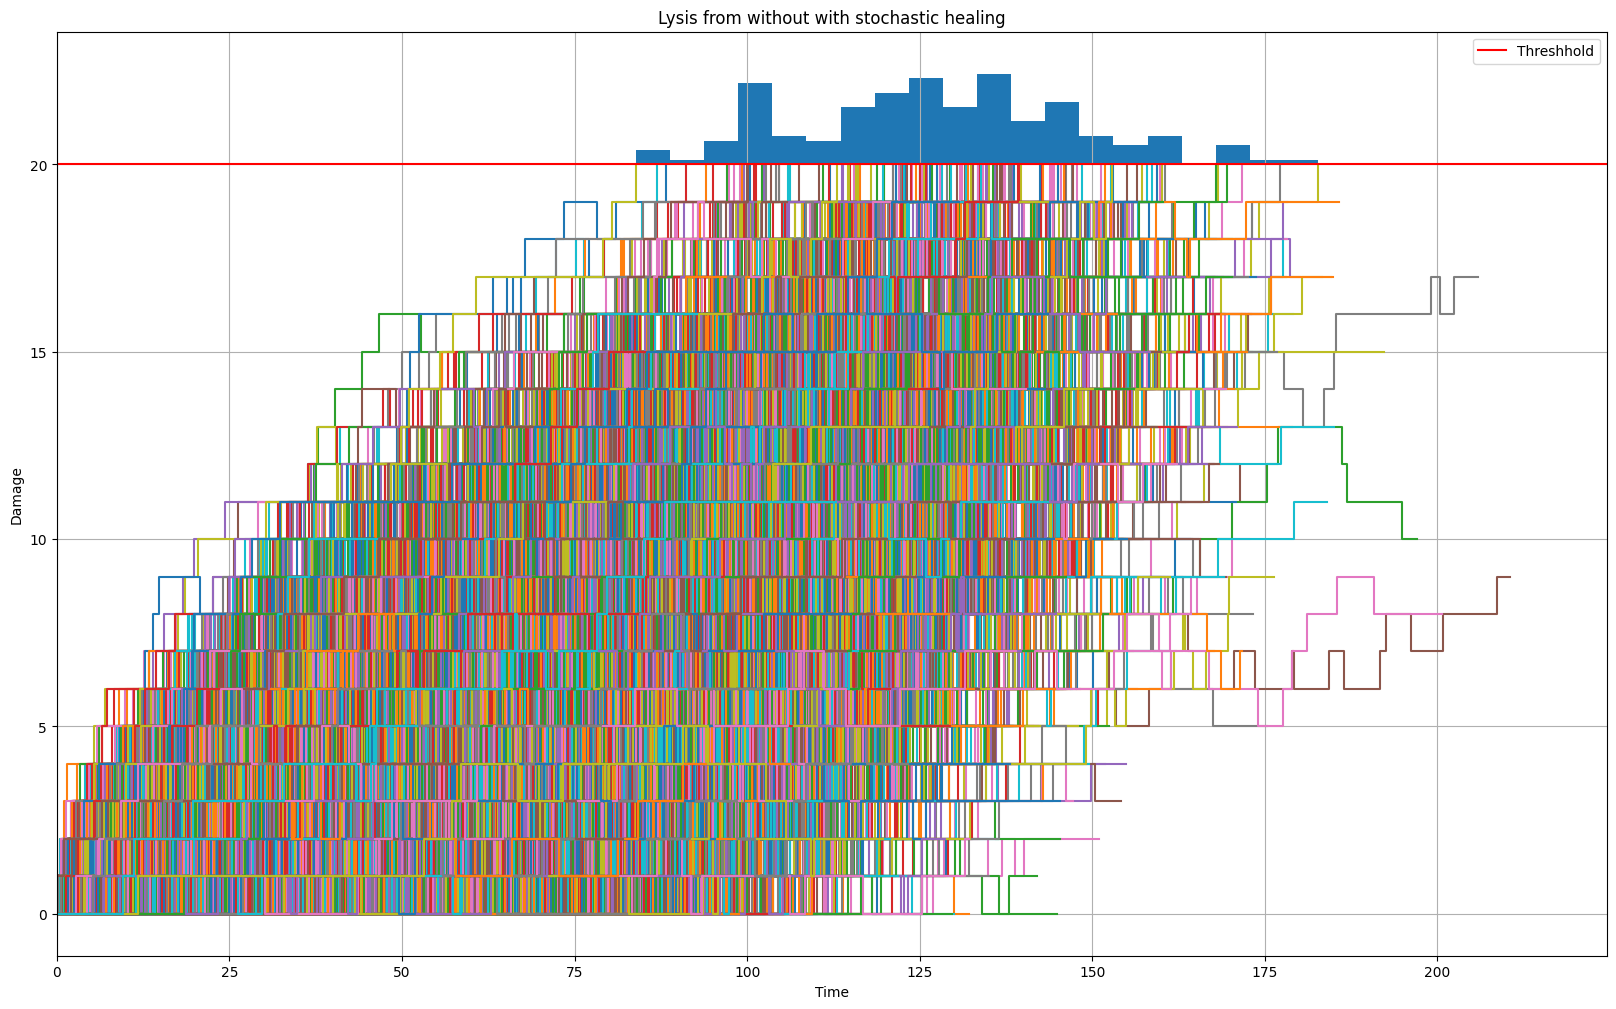

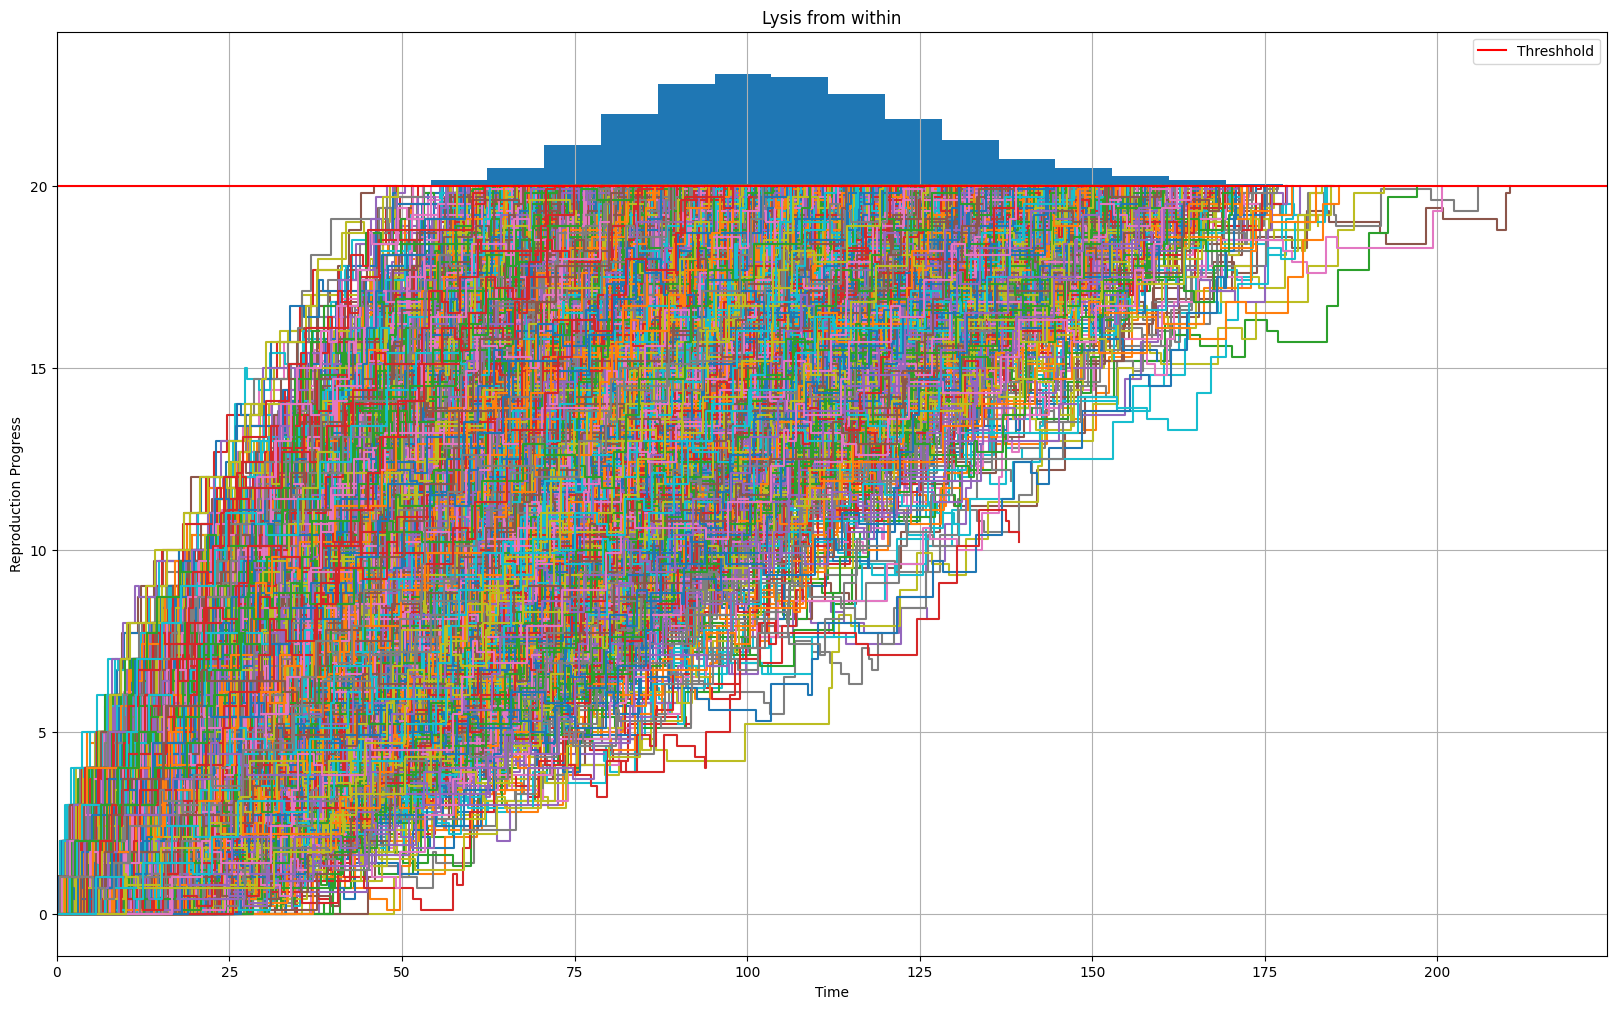

In [ ]:
#Lysis from without
#Stochastic healing model
def infection(initial, rate_out, threshhold_out, healing_factor, rate_in, threshhold_in):
    W = rate_out + healing_factor
    states_out = [initial]
    states_in = [initial]
    current_state_out = initial
    current_state_in = initial
    times = [0]
    time = 0
    
    while current_state_out < threshhold_out and current_state_in < threshhold_in:
        #Draw random numbers
        x1 = np.random.uniform(0,1)
        x2 = np.random.uniform(0,1)
        x3 = np.random.uniform(0,1)

        #Calculate time of next transition
        tau = -1/W * np.log(x1)
        tau2 = -1/rate_in * np.log(x2)

        if tau > tau2: #LO event

            #Damage transition
            if rate_out >= x3 * W:
                current_state_out += 1
                current_state_in -= 0.3
                
                #Avoid negative values
                if current_state_in < 0:
                    current_state_in = 0

                #Avoid overdamaging
                if current_state_out > threshhold_out:
                    current_state_out = threshhold_out
        
            #Healing transition
            else:
                current_state_out -= 1
                #Avoid overhealing
                if current_state_out < 0:
                    current_state_out = 0

            #Update time
            time += tau

        
        else:
            current_state_in += 1
            time += tau2

            #Dont cross threshhold
            if current_state_in > threshhold_in:
                current_state_in = threshhold_in



        #Append lists
        states_out.append(current_state_out)
        states_in.append(current_state_in)
        times.append(time)

    return times, states_out, states_in


N = 10000
N_LO = 0
N_LI = 0
initial = 0
rate_out = 0.5
rate_in = 0.5
heal = 0.2
threshhold_out = 20
threshhold_in = 20

t_max = 0
t_end_out = []
t_end_in = []

for i in range(N):
    times, states_out, states_in = infection(initial, rate_out, threshhold_out, heal, rate_in, threshhold_in)
    
    if max(states_out) == threshhold_out:
        t_end_out.append(max(times))
        N_LO += 1
    
    else:
        t_end_in.append(max(times))
        N_LI += 1

    plt.figure(0, figsize = (20,12))
    plt.step(times, states_out, where = 'post')

    plt.figure(1, figsize = (20,12))
    plt.step(times, states_in, where = 'post')

    if max(times) > t_max:
        t_max = max(times)




#Lysis from without plot
plt.figure(0)
plt.title('Lysis from without with stochastic healing')
plt.grid()
plt.plot(np.arange(0,round(t_max + t_max/5)), threshhold_out * np.ones(round(t_max + t_max/5)), color = 'red', label = 'Threshhold')
if len(t_end_out) > 0:
    plt.hist(t_end_out, bins = 20, weights = np.full(N_LO, threshhold_out/N_LO), bottom = threshhold_out)
plt.xlabel('Time')
plt.ylabel('Damage')
plt.xlim(0,t_max + t_max/15)
plt.legend()

#Lysis from within plot
plt.figure(1)
plt.title('Lysis from within')
plt.grid()
plt.plot(np.arange(0,round(t_max + t_max/5)), threshhold_in * np.ones(round(t_max + t_max/5)), color = 'red', label = 'Threshhold')
if len(t_end_in) > 0:
    plt.hist(t_end_in, bins = 20, weights = np.full(N_LI, threshhold_in/N_LI), bottom = threshhold_in)
plt.xlabel('Time')
plt.ylabel('Reproduction Progress')
plt.xlim(0,t_max + t_max/15)
plt.legend()

#Compare with Erlang distribution
#Determine P(t) from histogram
#Create model with competing processes: Lysis from within and without.

In [ ]:
def decomposition(number, parts):
    breakpoints = np.sort(np.random.randint(0, number + 1, parts - 1))  # Allow duplicates
    segments = np.diff([0] + breakpoints.tolist() + [number])  # Compute partition
    np.random.shuffle(segments)  # Shuffle for randomness
    return segments

# Example usage
print(decomposition(10, 4))  # Outputs something like [0, 0, 3, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0]

[1 4 1 4]


In [ ]:
def infection(Bacteria, phage, threshhold_out, rate_out, healing_factor):
    W = rate_out + healing_factor
    B = np.zeroes(Bacteria)
    tau = B
    tau2 = B
    time = B
    

    
    while np.all(current_states_out < threshhold_out):
        current_states_out = B + np.array(decomposition(phage, len(B)))
        current_states_in = B

        for i in range(len(B)): #Assumption: All initial phages attach to some constant number of Bacteria
            if current_states_out[i] > 0:
                x1 = np.random.uniform(0,1)
                x2 = np.random.uniform(0,1)
                tau[i] = -1/W * np.log(x1)

                if np.all(current_states_out > 0) #Check if any damage has been done, if so, then healing is possible.
                    tau2[i] = -1/rate_in * np.log(x2)

                if tau[i] < tau2[i]:
                    current_states_out[i] += 1
                    times[i] += tau[i]
                    
                    if current_states_out[i] == threshhold_out:
                        phage += 20
                        current_states_out

                
                else:
                    current_states_out[i] -= 1
                    times[i] += tau2[i]
            







        



    
infection(3,4)

lol
[1. 0. 0.]
lol
[2. 0. 0.]
lol
[3. 0. 0.]
lol
[4. 0. 0.]
